In [58]:
import warnings
warnings.simplefilter(action= 'ignore', category=FutureWarning)
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [59]:
data = pd.read_csv('1.04. Real-life example.csv')
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [60]:
data['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [61]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [62]:
data = data.drop(['Model'], axis = 1)

In [63]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [64]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [65]:
data = data.dropna(axis = 0)

In [66]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<AxesSubplot:xlabel='Price', ylabel='Density'>

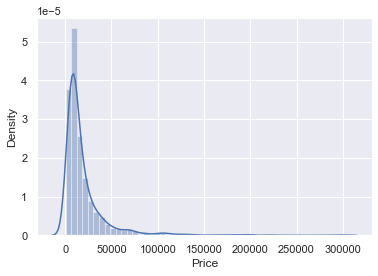

In [67]:
sns.distplot(data['Price'])

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3904,3904.000000,3904,3904.000000,3904.000000,3904,3904,3904.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1509,NaN,NaN,1790,3533,NaN
mean,NaN,16082.648299,NaN,168.296363,2.730789,NaN,NaN,2006.108607
std,NaN,14520.658287,NaN,101.330483,5.004271,NaN,NaN,6.611815
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,97.750000,1.800000,NaN,NaN,2002.000000
50%,NaN,11000.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20300.000000,NaN,231.000000,3.000000,NaN,NaN,2011.000000


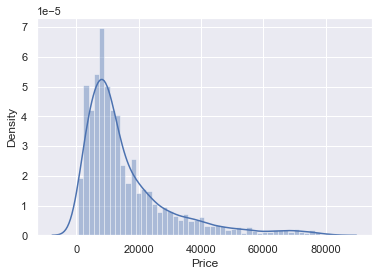

In [68]:
remove_out = data['Price'].quantile(0.97)
data = data[data['Price']<remove_out]
sns.distplot(data['Price'])
data.describe(include = 'all')

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

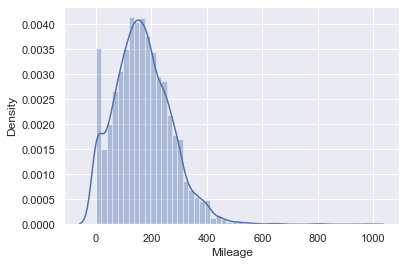

In [69]:
sns.distplot(data['Mileage'])

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3864,3864.000000,3864,3864.000000,3864.000000,3864,3864,3864.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1492,NaN,NaN,1762,3496,NaN
mean,NaN,16163.252836,NaN,164.621636,2.734576,NaN,NaN,2006.205745
std,NaN,14521.034076,NaN,94.450322,5.029389,NaN,NaN,6.534867
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6950.000000,NaN,97.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11200.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20500.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


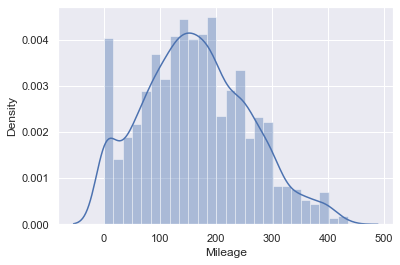

In [70]:
remove_out = data['Mileage'].quantile(0.99)
data = data[data['Mileage']<remove_out]
sns.distplot(data['Mileage'])
data.describe(include = 'all')

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

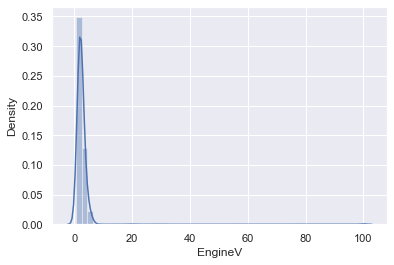

In [71]:
sns.distplot(data['EngineV'])

In [72]:
data = data[data['EngineV']<6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

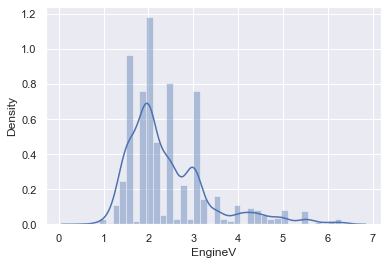

In [73]:
sns.distplot(data['EngineV'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

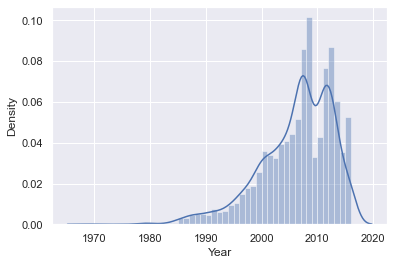

In [74]:
sns.distplot(data['Year'])

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3748,3748.000000,3748,3748.000000,3748.000000,3748,3748,3748.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,837,NaN,1422,NaN,NaN,1736,3387,NaN
mean,NaN,16535.458407,NaN,162.917556,2.434384,NaN,NaN,2006.716382
std,NaN,14558.369768,NaN,93.062000,0.943463,NaN,NaN,5.777512
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1990.000000
25%,NaN,7233.750000,NaN,96.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20900.000000,NaN,226.000000,3.000000,NaN,NaN,2011.000000


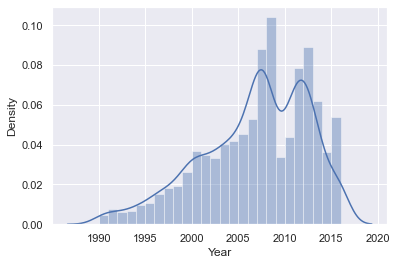

In [75]:
remove_out  = data['Year'].quantile(0.02)
data = data[data['Year']>remove_out]
sns.distplot(data['Year'])
data.describe(include = 'all')

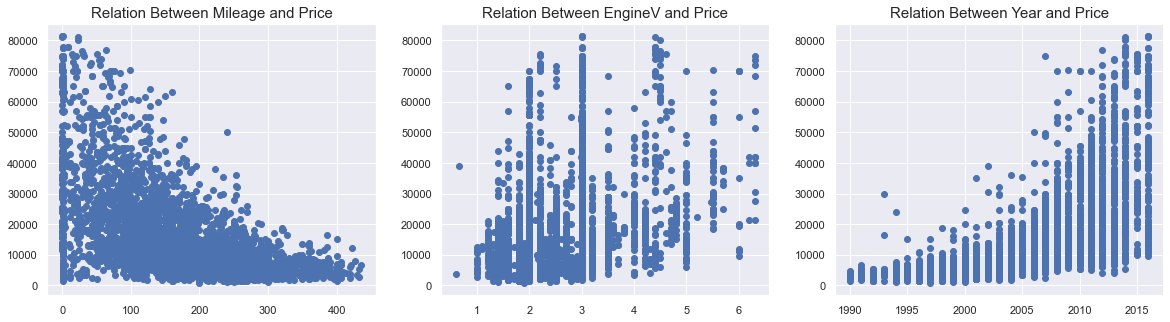

In [76]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(data['Mileage'], data['Price'])
plt.title('Relation Between Mileage and Price', size = 15)
plt.subplot(132)
plt.scatter(data['EngineV'], data['Price'])
plt.title('Relation Between EngineV and Price', size = 15)
plt.subplot(133)
plt.scatter(data['Year'], data['Price'])
plt.title('Relation Between Year and Price', size = 15)
plt.show()

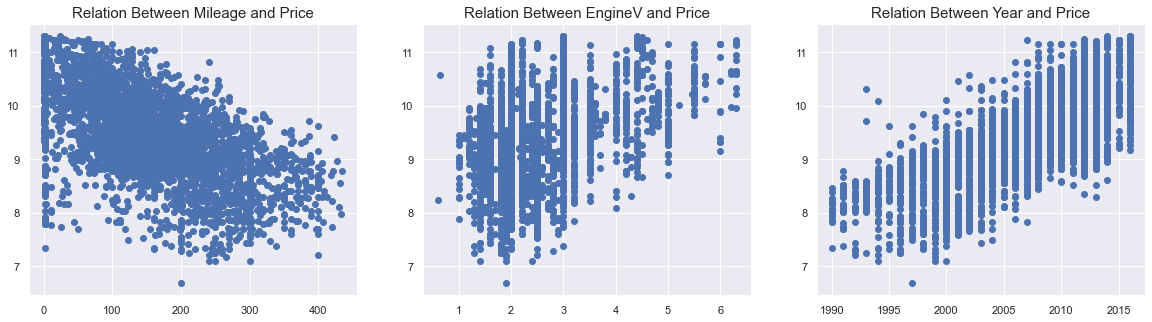

In [77]:
data['Price'] = np.log(data['Price'])
data.describe(include = 'all')
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(data['Mileage'], data['Price'])
plt.title('Relation Between Mileage and Price', size = 15)
plt.subplot(132)
plt.scatter(data['EngineV'], data['Price'])
plt.title('Relation Between EngineV and Price', size = 15)
plt.subplot(133)
plt.scatter(data['Year'], data['Price'])
plt.title('Relation Between Year and Price', size = 15)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

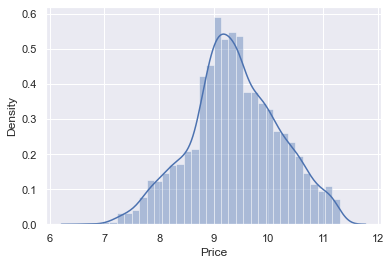

In [78]:
sns.distplot(data['Price'])

In [79]:
variables = data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(3)]
vif['Features'] = variables.columns
vif

,VIF,Features
0,4.045079,Mileage
1,10.285672,Year
2,7.668775,EngineV


In [80]:
variables = data[['Mileage','Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(2)]
vif['Features'] = variables.columns
vif

,VIF,Features
0,4.036127,Mileage
1,4.036127,Year


In [81]:
data = data.drop('EngineV', axis =1)

In [82]:
data = pd.get_dummies(data)
data

,Price,Mileage,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,8.342840,277,1991,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,8.974618,427,1999,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,9.495519,358,2003,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,10.043249,240,2007,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,9.814656,120,2011,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,8.824678,152,2007,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
4338,9.350102,163,2008,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
4339,9.792556,35,2014,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
4341,8.779557,1,1999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [83]:
# max(data['Mileage'])

In [84]:

x = data.drop(['Price'], axis = 1)
y = data['Price']
x.columns.values

array(['Mileage', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes'],
      dtype=object)

In [85]:
y = np.asarray(y).reshape(-1, 1)
y.shape

(3748, 1)

In [86]:
scaling = StandardScaler()
scaling.fit(x)
x = scaling.transform(x)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=365)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [88]:
model.score(x_train, y_train)

0.8432208266949479

In [89]:
model.score(x_test, y_test)

0.8237784284559453

In [90]:
pred = model.predict(x_test)

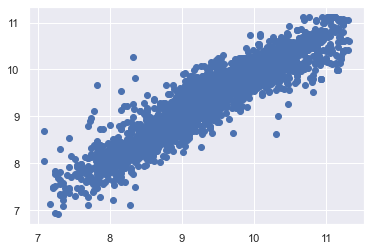

In [91]:
plt.scatter(y_train, model.predict(x_train))

<AxesSubplot:ylabel='Density'>

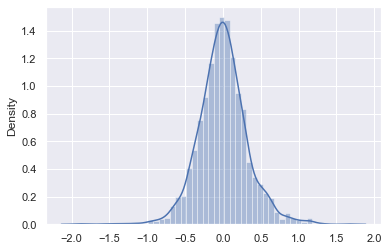

In [92]:
sns.distplot(y_train - model.predict(x_train))

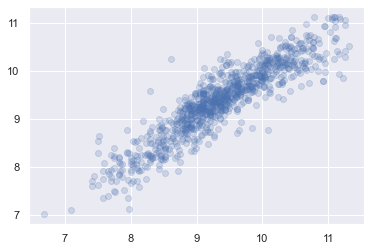

In [93]:
plt.scatter(y_test, pred, alpha=0.2)

In [97]:
def user_end(year, mileage, brand, body, engine_type, registration):
    data_copy = pd.DataFrame(columns=data.columns)
    data_copy.loc[0]=0
    data_copy.loc[0, 'Year'] = year
    data_copy.loc[0, 'Mileage'] = mileage
    data_copy.loc[0, brand] = 1
    data_copy.loc[0, body] = 1
    data_copy.loc[0, engine_type] = 1
    data_copy.loc[0, 'Registration_yes'] = registration
#     data_copy.loc[0, 'EngineV'] = engine_volume
    data_copy = data_copy.drop(['Price'], axis = 1)
    c = scaling.transform(data_copy)
    return np.exp(model.predict(c))
#     return data_copy
user_end(2008, 100, 'Brand_Volkswagen', 'Body_sedan','Engine Type_Petrol', 1)[0][0]

12252.269598338036

In [ ]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# import pandas as pd
# import numpy as np
# df_pf = pd.DataFrame(columns = [['Mileage', 'Brand_BMW', 'Brand_Mercedes-Benz',
#        'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
#        'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
#        'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
#        'Engine Type_Petrol', 'Registration_yes']])
# df_pf

In [ ]:
# df_pf['Mileage'] = 277
# df_pf['Body_hatch', 'Body_other', 'Body_sedan',
#        'Body_vagon', 'Body_van',] = [1, 0, 0, 0, 0]
# df_pf['Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol'] = [1, 0, 0]
# df_pf['Registration_yes'] = 1
# df_pf = df_pf[['Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volkswagen']] = [0, 1, 0, 0, 0, 0]
# df_pf['Body_hatch'] = [1, 0, 0]
# df_pf

In [ ]:

# df_pf.fillna('Non')
# df_pf['Body'] = ['hatch', 'other', 'sedan', 'vagon', 'van', None,]
# df_pf['Brand'] = ['BMW', 'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota', 'Volkswagen']
# df_pf['Engine Type'] = ['Gas', 'Other', 'Petrol', None, None, None]
# # df_pf
# df_pf = pd.get_dummies(df_pf)
# df_pf

In [ ]:
# data = pd.read_csv('1.04. Real-life example.csv')
# data.head()

In [ ]:
# data['Brand1'] = data.Brand

In [ ]:
# c = pd.get_dummies(data['Brand1'])
# v = pd.concat([data, c], axis = 1)

In [ ]:

# v.columns

In [ ]:
# data_withoun_brand = v.drop(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
#        'Registration', 'Year', 'Model', 'Brand1'], axis = 1)

In [ ]:
# data_brand = v[['Audi', 'BMW',
#        'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota', 'Volkswagen']]
# data_brand

In [ ]:
# data_brand['brand'] = v.Brand1
# data_brand

In [ ]:
# data_brand.columns

In [ ]:
# f = pd.DataFrame(columns=['Audi', 'BMW', 'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota',
#        'Volkswagen', 'brand'])

In [ ]:
# f

In [ ]:
# z = pd.DataFrame(columns=['Audi', 'BMW', 'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota',
#        'Volkswagen', 'brand'])
# y = 0
# x = 0
# for x in ['Audi', 'BMW', 'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota', 'Volkswagen', 'brand']:
#     t = data_brand[data_brand.brand == x].head(1)
#     z = pd.concat([z, t], axis = 0)
# z

In [ ]:
# v = z[z['brand']=='BMW'].values[0][:-1]
# v = list(v)
# v

In [ ]:
# data_brand[data_brand.brand == 'BMW'].head(1)